In [49]:
# Python program to read
# json file

import os, json
import pandas as pd

path_to_json = 'results/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]
print(json_files)  # for me this prints ['foo.json']


# Opening JSON file


['2021-09-06-13-05-12 - Martin Büßemeyer.json', '2021-09-06-15-15-57 - Tobias Markus.json', '2021-09-06-16-18-00 - Dominik Meier.json', '2021-09-06-17-11-22 - Joana Bergsiek.json', '2021-11-28-19-40-13 - William Lamm.json']


In [50]:


def leveltimes(file):
    file = json.load(file)
    i=0
    lvlCode = None
    levelLengths = {}
    nLevels=0
    start = 0
    end = 0
    ignore = False
    levelname = ""
    scenario = ""

    for event in file:
        i+=1
        if(event["name"]=="GameStartEvent"):
            lvlCode = event["levelCode"]
        if(event["name"]=="LevelChangedEvent"):
            start = event["createdAt"]
            if(event["levelName"]=="LevelTraining(Clone)" or event["levelName"]=="Level1(Clone)"):
                ignore=True
            else:
                if lvlCode.startswith("1") and nLevels<3 or lvlCode.startswith("2") and nLevels>=3:
                    scenario="1"
                else:
                    scenario = "0"
                levelname=event["levelName"][5:7]+"_"+scenario

        if(event["name"]=="LevelCompletedEvent"):
            end = event["createdAt"]
            
        if(event["name"]=="SurveySubmittedEvent"):
            selection=event["selectedLevelImage"]
            confidence=event["selectedConfidence"]
            if(not ignore):
                levelLengths.update({levelname:((end-start),selection,confidence)})
                nLevels+=1
            ignore = False
            end = 0
            start = 0
            
    if(len(levelLengths)>6):
        return "error, list too long"   
    if(lvlCode==None):
        print("error no level code was found")
        return None
    print(lvlCode,levelLengths)
    levelLengths.update({"condition":lvlCode})
    return levelLengths
#leveltimes(file)

In [51]:
import pandas as pd

frame = pd.DataFrame()
for i in json_files:
    file = open("./results/"+i)
    lis = leveltimes(file)
    nframe = pd.DataFrame([lis])
    frame=frame.append(nframe)
frame=frame.sort_index(axis=1)
print(frame)


1aaa {'2A_1': (175.1597, 'C', 4), '3A_1': (78.6449, 'A', 3), '4A_1': (66.07500000000005, 'B', 2), '2B_0': (22.644999999999982, 'C', 2), '3B_0': (191.68200000000002, 'A', 2), '4B_0': (171.789, 'B', 3)}
2bbb {'2B_0': (16.66149999999999, 'A', 1), '3B_0': (86.19530000000003, 'A', 3), '4B_0': (89.75999999999993, 'A', 4), '2A_1': (20.865999999999985, 'A', 1), '3A_1': (19.052999999999997, 'A', 1), '4A_1': (62.266999999999825, 'A', 3)}
1bbb {'2B_1': (73.42359999999996, 'A', 1), '3B_1': (358.8229, 'A', 4), '4B_1': (276.486, 'A', 2), '2A_0': (89.21100000000001, 'A', 2), '3A_0': (101.55300000000011, 'A', 1), '4A_0': (45.92899999999986, 'A', 1)}
2aaa {'2A_0': (41.594799999999964, 'A', 1), '3A_0': (34.315300000000036, 'C', 3), '4A_0': (49.269499999999994, 'B', 4), '2B_1': (48.49940000000004, 'A', 1), '3B_1': (68.1413, 'C', 4), '4B_1': (247.32049999999992, 'A', 4)}
1aaa {'2A_1': (52.07130000000001, 'A', 1), '3A_1': (52.49959999999999, 'A', 1), '4A_1': (308.67499999999995, 'C', 3), '2B_0': (16.525999

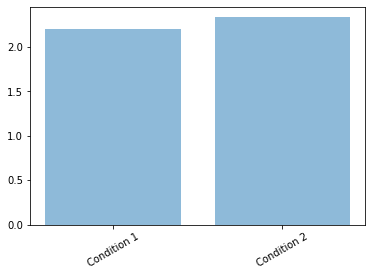

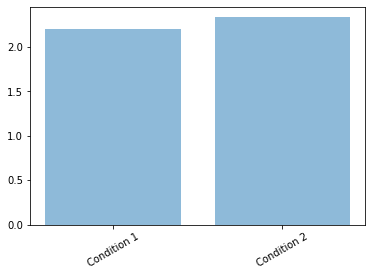

<Figure size 432x288 with 0 Axes>

In [52]:
#Confidence By Condition
import numpy as np
import matplotlib.pyplot as plt
condition1=[x for x in frame.columns.to_list() if x.endswith("0")]
condition2=[x for x in frame.columns.to_list() if x.endswith("1")]

#list of confidences condition1, condition2 conf = []
conf1 = []
conf2 = []
confPerLevel = []
sel1 = []
sel2 = []

for i in range(0,len(frame)):
    row = frame.iloc[i]
    cpl = []
    for x in range(0,len(row)):
        if(type(row[x]) is tuple):
            if(row.index[x].endswith("0")):
                conf1.append(row[x][2])
                sel1.append(row[x][1]=="A")
            else:
                conf2.append(row[x][2])
                sel2.append(row[x][1]=="A")
            cpl.append(row[x][2])
    confPerLevel.append(np.mean(cpl))
    
                




values1 = np.mean(conf1)
values2 = np.mean(conf2)

acc1 = np.mean(sel1)
acc2 = np.mean(sel2)
plt.bar(["Condition 1","Condition 2"],[acc1,acc2],alpha=0.5,align="center")
plt.xticks(rotation=30)
plt.show()
plt.savefig("confidence_by_condition.png")


values1 = np.mean(conf1)
values2 = np.mean(conf2)

plt.bar(["Condition 1","Condition 2"],[values1,values2],alpha=0.5,align="center")
plt.xticks(rotation=30)
plt.show()
plt.savefig("accuracy_by_condition.png")


In [53]:
print(confPerLevel)
plt.bar(frame.columns[],confPerLevel,alpha=0.5,align="center")
plt.xticks(rotation=30)
plt.show()
plt.savefig("confidence_by_condition.png")

SyntaxError: invalid syntax (<ipython-input-53-5bf00b49fa35>, line 2)